In [1]:
import bnlearn
import pandas as pd
import read_bayesnet
from read_bayesnet import BayesianNetwork, Variable


Bad key "text.kerning_factor" on line 4 in
/home/artfer/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
bn = BayesianNetwork(file='asia.bif') 
for v in bn.variables:
    print('node : ',v.name,'\nparents : ',v.parents,'\nmarkov blanket : ',v.markov_blanket,'\nprobs : ',v.probabilities,'\n')

node :  asia 
parents :  [] 
markov blanket :  ['tub', 'asia'] 
probs :  {'yes': 0.01, 'no': 0.99} 

node :  tub 
parents :  ['asia'] 
markov blanket :  ['either', 'tub', 'asia'] 
probs :  {('yes',): {'yes': 0.05, 'no': 0.95}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  smoke 
parents :  [] 
markov blanket :  ['lung', 'bronc', 'smoke'] 
probs :  {'yes': 0.5, 'no': 0.5} 

node :  lung 
parents :  ['smoke'] 
markov blanket :  ['lung', 'either', 'smoke'] 
probs :  {('yes',): {'yes': 0.1, 'no': 0.9}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  bronc 
parents :  ['smoke'] 
markov blanket :  ['bronc', 'smoke', 'dysp'] 
probs :  {('yes',): {'yes': 0.6, 'no': 0.4}, ('no',): {'yes': 0.3, 'no': 0.7}} 

node :  either 
parents :  ['lung', 'tub'] 
markov blanket :  ['lung', 'either', 'tub', 'xray', 'dysp'] 
probs :  {('yes', 'yes'): {'yes': 1.0, 'no': 0.0}, ('no', 'yes'): {'yes': 1.0, 'no': 0.0}, ('yes', 'no'): {'yes': 1.0, 'no': 0.0}, ('no', 'no'): {'yes': 0.0, 'no': 1.0}} 

node :  xray 
par

# Running the algorithm with different iterations

{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'no', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'no', 'smo

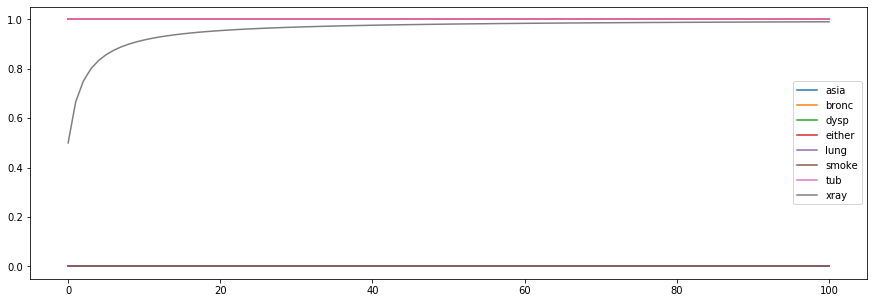

In [7]:
res, df = bn.gibbs_sampling(iterations=1,warm_up=100, query=False)
df.plot(figsize=(15,5))

In [5]:
res

{'asia': {'yes': 1.0, 'no': 0.0},
 'tub': {'yes': 0.05, 'no': 0.95},
 'smoke': {'yes': 0.1, 'no': 0.9},
 'lung': {'yes': 0.0, 'no': 1.0},
 'bronc': {'yes': 0.95, 'no': 0.05},
 'either': {'yes': 1.0, 'no': 0.0},
 'xray': {'yes': 0.05, 'no': 0.95},
 'dysp': {'yes': 0.0, 'no': 1.0}}

# Running the algorithms many times so it uses different samples

{'asia': 'no', 'tub': 'yes', 'smoke': 'no', 'lung': 'yes', 'bronc': 'yes', 'either': 'yes', 'xray': 'no', 'dysp': 'no'}
{'asia': 'no', 'tub': 'yes', 'smoke': 'no', 'lung': 'yes', 'bronc': 'yes', 'either': 'no', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'yes', 'smoke': 'no', 'lung': 'no', 'bronc': 'no', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'no', 'tub': 'no', 'smoke': 'yes', 'lung': 'no', 'bronc': 'no', 'either': 'yes', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'no', 'tub': 'yes', 'smoke': 'yes', 'lung': 'yes', 'bronc': 'yes', 'either': 'no', 'xray': 'no', 'dysp': 'no'}
{'asia': 'no', 'tub': 'no', 'smoke': 'no', 'lung': 'yes', 'bronc': 'yes', 'either': 'no', 'xray': 'no', 'dysp': 'yes'}
{'asia': 'no', 'tub': 'yes', 'smoke': 'yes', 'lung': 'yes', 'bronc': 'no', 'either': 'no', 'xray': 'yes', 'dysp': 'yes'}
{'asia': 'yes', 'tub': 'yes', 'smoke': 'no', 'lung': 'no', 'bronc': 'no', 'either': 'yes', 'xray': 'no', 'dysp': 'no'}
{'asia': 'yes', 'tub': 'no', 'smoke': '

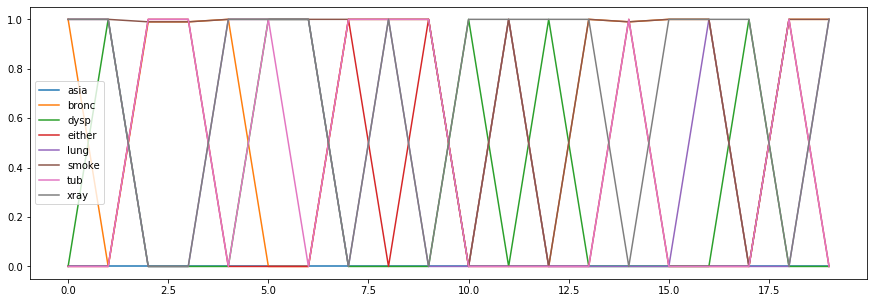

In [6]:
df = pd.DataFrame()

monitor = bn.generate_monitor()

for i in range(20):
    results, _ = bn.gibbs_sampling(iterations=100)
    df = df.append(results,ignore_index=True)
    print(i,end='\r')

for m in monitor:
    df[m] = df[m].apply(lambda x : x[monitor[m]])
#df = df.applymap(lambda x : x['yes'])
df.plot(figsize=(15,5))

# Using the bnlearn package

Generating for node: xray: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]  


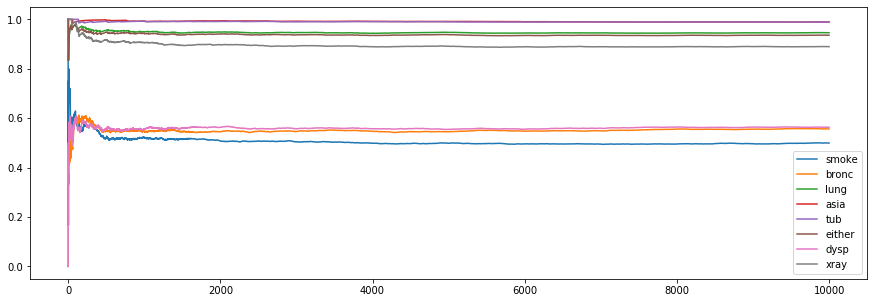

In [4]:
DAG = bnlearn.import_DAG('asia.bif', verbose=0) # read file

df = bnlearn.sampling(DAG, n=10000, verbose=0) # get samples

df_prob = pd.DataFrame(columns = df.columns) # dataframe for the probabilities

for i in range(len(df.index)): # for every sample
    print(i, end='\r')
    if i > 0:
        tmp = [] # lsit with probabilties of each node for this iteration
        
        for j in range(len(df.columns)): # for every node
            col = df.columns[j]
            
            tmp_df = df[:i][col] # get the samples, until this one
            try:
                c = tmp_df.value_counts(normalize=True).loc[1] # get value for 'yes'
            except:
                c = 0.0 # 0 if probability for 'yes' does not exist
            tmp.append(c)
        df_prob.loc[len(df_prob)] = tmp

df_prob.plot(figsize=(15,5))